# Particles Swarm Optimisation (PSO)
## Exemple sur la recherche du point le plus bas

Le principe d'un algorithme de type PSO (*Particles Swarm Optimisation*, recherche en essaim)  vise à éviter les minima locaux.
Cela fait parti des approches bio-inspirée. 

Des particules sont envoyées au hasard dans l'environnement, puis chaque particules se déplacent vers un position proche la valeur la plus basse qu'elle a rencontrée, ou qu'une autre particule du groupe a rencontré.

La nouvelle position d'une particule dépend de son vecteur vitesse, qui est modifié par rapport à sa position actuelle, sa meilleure position connue et la meilleur position connue par le groupe.
- Adaptation de la vitesse de la particule $i$: <br>
${v}_i(t+1) = w \cdot \mathbf{v}_i(t) + c_1 \cdot r_1 \cdot (\mathbf{p}_i - \mathbf{x}_i(t)) + c_2 \cdot r_2 \cdot (\mathbf{g} - \mathbf{x}_i(t))$
  - $w$: facteur d'inertie
  - $\mathbf{p}_i$: meilleure position connue de la particule $i$
  - $\mathbf{g}$: meilleure position connue par une particule du groupe
  - $c_1$ : coefficient individuel
  - $c_2$ : coefficient social
  - $r_1, r_2$: coefficients aléatoires entre 0 et 1.

- Adaptation de la position de la particule $i$ : ${x}_i(t+1) = \mathbf{x}_i(t) + \mathbf{v}_i(t+1)$

---

In [2]:
#quelques imports 
import numpy as np
import mylib_rastrigin as rastlib
import matplotlib.pyplot as plt

## Problème
On utilise ici la fonction de [Rastrigin](https://fr.wikipedia.org/wiki/Fonction_de_Rastrigin).
Fonction qui possède un grand nombre de minima locaux, spn minimum est à l'origine, mais ce sera aux particules de trouver cette valeur.

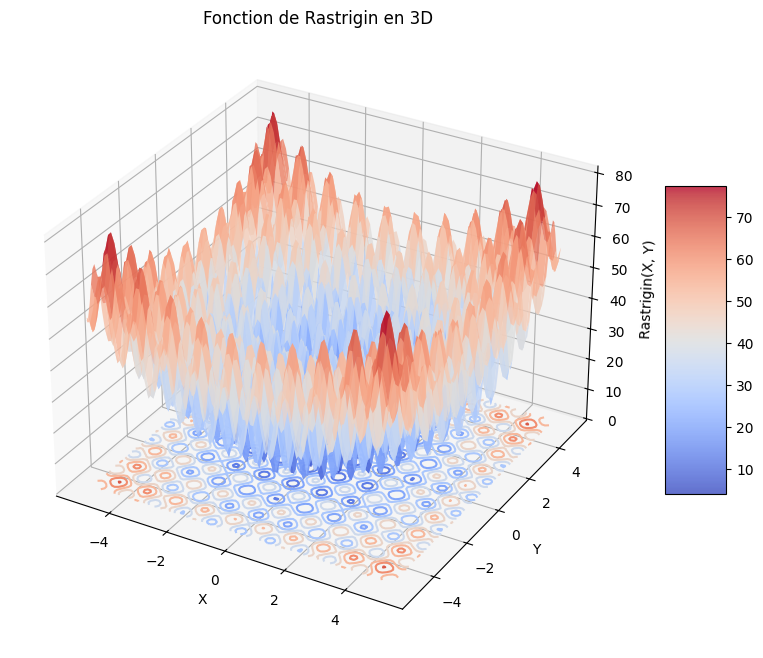

In [9]:
#exemple de la fonction de rastrigin en 3D
figure = rastlib.visualize_rastrigin_3d(with_sliders=False)

---
## Algorithme PSO

### Initialisation des particules
Assez basiquement, sans *a priori* sur la nature du problème, on peut poser que chaque particule part d'une position aléatoire avec une vitesse aléatoire.

In [10]:
### Initialisation de la PSO
# num_particles : nb de particules
num_particles=100
# num_dimensions = dimension des particules (nb de variables)
num_dimensions=2
# num_iterations = nb d'itérations
num_iterations=150
# coefficients de la PSO
# w : Inertie
w=1.5
# c1 : Coefficient cognitif
c1=0.8
# c2 : Coefficient social
c2=1.8

In [18]:
# Initialisation des particules
# positions des particules : tableau de 'num_particles' vecteurs de 'num_dimensions' dimensions remplis de valeurs entre -5.12 et 5.12
tab_particles_position = np.random.uniform(-5.12, 5.12, (num_particles, num_dimensions))

# vitesses des particules : tableau de 'num_particles' vecteurs de 'num_dimensions' dimensions remplis de valeurs entre -1 et 1
tab_particles_velocity = np.random.uniform(-1, 1, (num_particles, num_dimensions))

# tableau de 'num_particles' vecteurs de 'num_dimensions' dimensions, représentant la meilleure position de chaque particule
# initialement, la meilleur position de chaque particule est sa position actuelle
tab_pbest_position = tab_particles_position.copy()

# tableau de 'num_particles' valeurs, représentant la meilleure valeur trouvée à la meilleure position de chaque particule
tab_pbest_score = np.array([rastlib.rastrigin_function(p) for p in tab_particles_position])

# gbest_position : meilleure position globale, initialisée à la position de valeur la plus basse trouvée par une particule
gbest_position = tab_particles_position[np.argmin(tab_pbest_score)]

# gbest_score : meilleur score global, initialisé à la plus petite valeur trouvée par une particule
gbest_score = np.min(tab_pbest_score)

# Stockage des positions juste pour le tracé
# liste contenant l'historique du tableau tab_particles_position à chaque itération
positions_history = [tab_particles_position.copy()]

In [34]:
#petite fonction de réinitialisation, au cas où
def init(_num_particles=100, _num_dimensions=2, _num_iterations=150, _w=1.5, _c1=0.8, _c2=1.8):
    global num_particles, num_dimensions, num_iterations, w, c1, c2
    global tab_particles_position, tab_particles_velocity, tab_pbest_position, tab_pbest_score, gbest_position, gbest_score, positions_history
    num_particles = _num_particles
    num_dimensions = _num_dimensions
    num_iterations = _num_iterations
    w = _w
    c1 = _c1
    c2 = _c2
    # Initialisation des particules
    # chaque particule se trouve dans un espace carré de dimension 2 de coordonnées [-5.12, 5.12]
    # tableau de 'num_particles' vecteurs de 'num_dimensions' dimensions remplis de valeurs entre -5.12 et 5.12
    tab_particles_position = np.random.uniform(-5.12, 5.12, (num_particles, num_dimensions))
    # chaque particule a une vitesse initiale aléatoire
    # tableau de 'num_particles' vecteurs de 'num_dimensions' dimensions remplis de valeurs entre -1 et 1
    tab_particles_velocity = np.random.uniform(-1, 1, (num_particles, num_dimensions))
    # Initialisation des meilleures positions
    # tab_pbest_position : meilleure position de chaque particule, initialisée à la position actuelle
    # tableau de 'num_particles' vecteurs de 'num_dimensions' dimensions, représentant la meilleure position de chaque particule
    tab_pbest_position = tab_particles_position.copy()
    # tab_pbest_score : meilleur score de chaque particule, initialisé à la valeur de la fonction à la position actuelle
    # tableau de 'num_particles' valeurs, représentant la meilleure valeur trouvée à la meilleure position de chaque particule
    tab_pbest_score = np.array([rastlib.rastrigin_function(p) for p in tab_particles_position])
    # gbest_position : meilleure position globale, initialisée à la position de valeur la plus basse trouvée par une particule
    gbest_position = tab_particles_position[np.argmin(tab_pbest_score)]
    # gbest_score : meilleur score global, initialisé à la plus petite valeur trouvée par une particule
    gbest_score = np.min(tab_pbest_score)
    # Stockage des positions juste pour le tracé
    # liste contenant l'historique du tableau tab_particles_position à chaque itération
    positions_history = [tab_particles_position.copy()]

### Rechercher la solution en essaim
On applique ensuite "simplement" le principe énoncé plus haut pour chaque particule (modification de la vitesse, modification de la position).


In [29]:
def pso_search(_num_iterations = 100):    
    global gbest_position, gbest_score, num_iterations
    num_iterations = _num_iterations
    # Optimisation
    for _ in range(num_iterations):
        for i in range(num_particles):
            # Mise à jour de la vitesse
            r1 = np.random.rand(num_dimensions)
            r2 = np.random.rand(num_dimensions)
            tab_particles_velocity[i] = (w * tab_particles_velocity[i] +
                                    c1 * r1 * (tab_pbest_position[i] - tab_particles_position[i]) +
                                    c2 * r2 * (gbest_position - tab_particles_position[i]))

            # Mise à jour de la position
            tab_particles_position[i] += tab_particles_velocity[i]

            # Évaluation de la nouvelle position
            score = rastlib.rastrigin_function(tab_particles_position[i])

            # Mise à jour de pbest
            if score < tab_pbest_score[i]:
                tab_pbest_position[i] = tab_particles_position[i].copy()
                tab_pbest_score[i] = score

            # Mise à jour de gbest
            if score < gbest_score:
                gbest_position = tab_particles_position[i].copy()
                gbest_score = score

        # Stockage des positions actuelles
        positions_history.append(tab_particles_position.copy())

    print("Meilleure position trouvée :", gbest_position)
    print("Score (valeur de la fonction) :", gbest_score)

### Tracé de la recherche en essaim
Petite fonction dessinant les position des différentes particules

In [41]:
def plot_convergence():
    # Tracé des courbes de convergence
    plt.figure(figsize=(20, 20))
    for i in range(num_particles//20):
        particle_history = np.array([pos[i] for pos in positions_history])
        plt.plot(particle_history[:, 0], particle_history[:, 1], marker='o', label=f'Particule {i+1}')

    #dessin au trait fin 
    plt.scatter(gbest_position[0], gbest_position[1], color='red', zorder=5, label='Meilleure Position')
    plt.title('Courbes de Convergence des Particules (PSO en 2D)')
    plt.grid(True)
    plt.show()

---
### Tests

In [38]:
init(_num_particles=200)

In [39]:
pso_search(_num_iterations = 300)

Meilleure position trouvée : [-1.01507803 -0.01610756]
Score (valeur de la fonction) : 1.1266561973067866


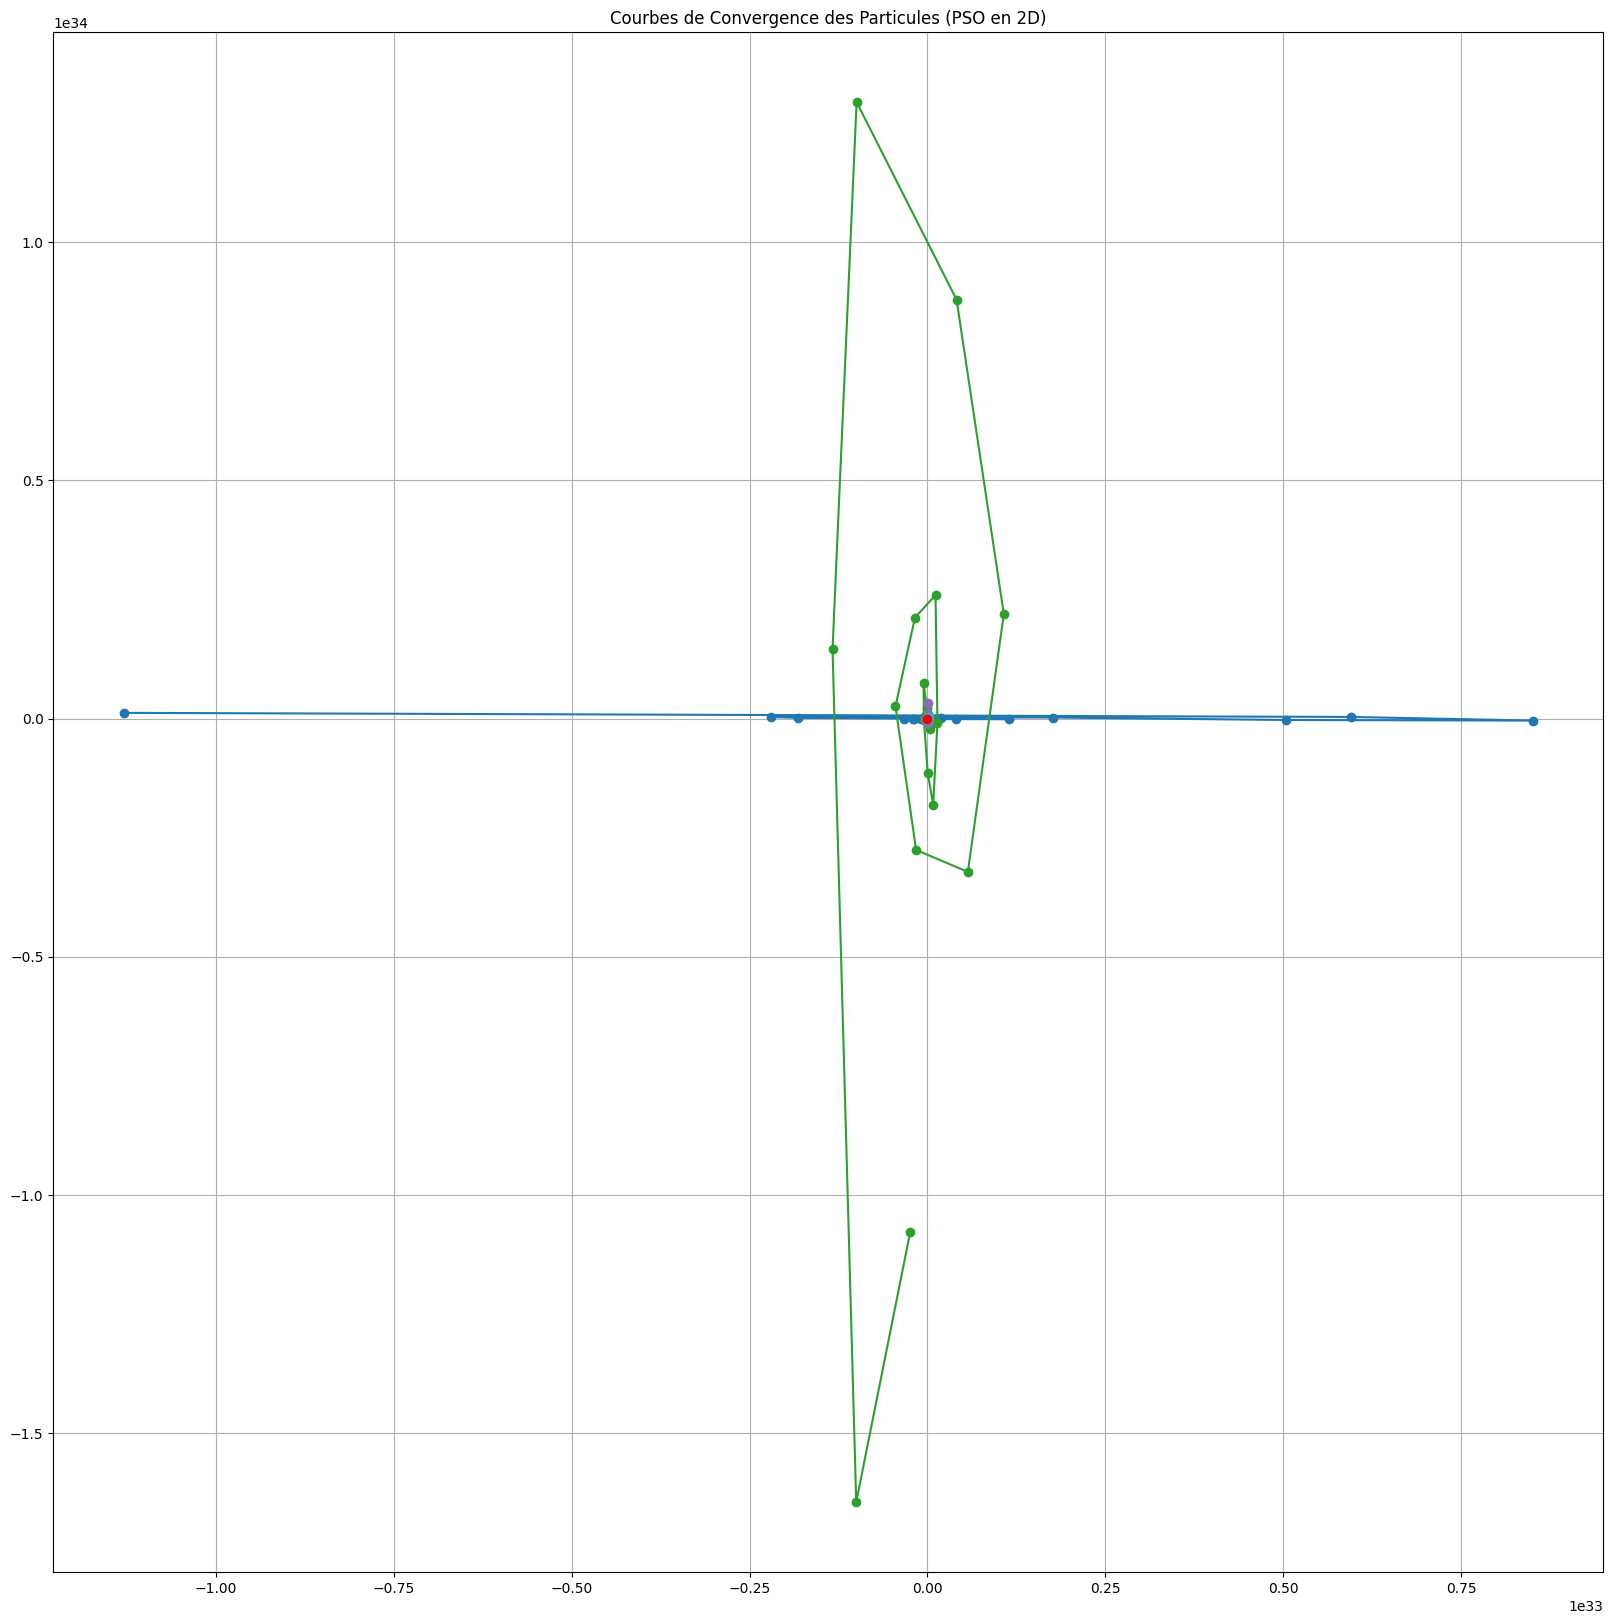

In [42]:
plot_convergence()

On peut jouer sur le comportement social ou égocentré des particules pour étudier la convergence.

De même, on pourrait autoriser certaines particules à être indépentante (coef c1 élevé) et d'autre très "coopérante" (coef c2 élevé).